In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#AGRUPAR POR LATITUD Y LONGITUD CON SU DETERMINADA FRECUENCIA
clicks = pd.read_csv('C:/Users/Alan Camussi/Desktop/data/clicks.csv.gzip', compression='gzip')
clicks
clicks_Reduced = clicks[['ref_hash','latitude','longitude']]
clicks_Reduced['cantidad']=1
clicks_Reduced.dtypes
clicks_Reduced_agrupado = clicks_Reduced.groupby(('latitude', 'longitude'))['cantidad'].sum()
clicks_Reduced_agrupado = clicks_Reduced_agrupado.to_frame()

#Resetea los indices para que latitude y longitude sean columnas
clicks_Reduced_agrupado = clicks_Reduced_agrupado.reset_index()


# Muestra cada latitud y longitud con su correspondiente cantidad de clicks ordenados de mayor a menor
clicks_Reduced_agrupado.sort_values(by='cantidad', ascending=False)



c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
c:\users\alan camussi\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


,latitude,longitude,cantidad
9,1.205689,1.070234,22949
69,1.218924,1.071209,1105
80,1.235406,1.063737,281
5,1.205393,1.077238,250
36,1.208059,1.069624,186
0,1.205058,1.077332,171
74,1.223819,1.059475,100
27,1.206592,1.069958,90
49,1.209520,1.065525,85
47,1.209372,1.067147,83


In [2]:
# Muestra las 10 latitudes y longitudes con mayor cantidad de clicks realizados

clicks_Reduced_agrupado_10 = clicks_Reduced_agrupado.sort_values(by='cantidad', ascending=False).head(10)
clicks_Reduced_agrupado_10

,latitude,longitude,cantidad
9,1.205689,1.070234,22949
69,1.218924,1.071209,1105
80,1.235406,1.063737,281
5,1.205393,1.077238,250
36,1.208059,1.069624,186
0,1.205058,1.077332,171
74,1.223819,1.059475,100
27,1.206592,1.069958,90
49,1.209520,1.065525,85
47,1.209372,1.067147,83


In [10]:
#Crea columna ALIAS para que las coordenadas sean mas legibles en el grafico
clicks_Reduced_agrupado_10['alias']=0 

#Seteo el alias de las 10 coordenadas con mayor cantidad de clicks
i = 0
for index, row in clicks_Reduced_agrupado_10.iterrows():
    clicks_Reduced_agrupado_10['alias'].iloc[i] = i
    i = i + 1
    
clicks_Reduced_agrupado_10
    

,latitude,longitude,cantidad,alias
9,1.205689,1.070234,22949,0
69,1.218924,1.071209,1105,1
80,1.235406,1.063737,281,2
5,1.205393,1.077238,250,3
36,1.208059,1.069624,186,4
0,1.205058,1.077332,171,5
74,1.223819,1.059475,100,6
27,1.206592,1.069958,90,7
49,1.209520,1.065525,85,8
47,1.209372,1.067147,83,9


Text(0, 0.5, 'Cantidad de clicks')

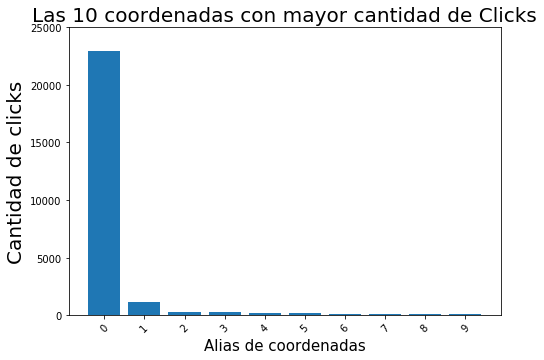

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


plt.axes((0.1, 0.3, 1, 1))  
plt.bar(np.arange(10), clicks_Reduced_agrupado_10['cantidad']) 
plt.ylim(0,25000)  
plt.title('Las 10 coordenadas con mayor cantidad de Clicks', fontsize=20) 
plt.xticks(np.arange(10), clicks_Reduced_agrupado_10['alias'], rotation = 45) 
plt.xlabel('Alias de coordenadas', fontsize=15);
plt.ylabel('Cantidad de clicks', fontsize=20)